In [1]:
#using VADER to calculate sentiment analysis
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
import numpy as np

In [2]:
#loading data
headlines = pd.read_csv('FiQA_train_ABSA_financial_headlines.tsv',delimiter='\t',header=0)
posts = pd.read_csv('FiQA_train_ABSA_financial_posts.tsv',delimiter='\t',header=0)
posts = posts.drop(['Unnamed: 0', 'id'],axis=1)
headlines = headlines.drop(['Unnamed: 0', 'id'],axis=1)
posts_text = posts.iloc[:,:1]
posts_score = posts.iloc[:,1:]
headlines_text = headlines.iloc[:,:1]
headlines_score = headlines.iloc[:,1:]
text_frames = [posts_text,headlines_text]
score_frames = [posts_score,headlines_score]
text = pd.concat(text_frames)
score = pd.concat(score_frames)

In [3]:
sentences = []
intensity = []
for sent in text.values.tolist():
    sentences.append(sent[0])
for scr in score.values.tolist():
    intensity.append(scr[0])

In [4]:
analyser = SentimentIntensityAnalyzer()

In [5]:
prediction=[]
for sent in sentences:
    prediction.append(analyser.polarity_scores(sent)['compound'])
    

In [6]:
len(intensity)

3789

In [7]:
#calculating error
error = []
for n,m in zip(intensity,prediction):
    error.append((max(n,m)-min(n,m))*100/2)

In [8]:
print("mean of error  "+str(sum(error)/len(error)))
print("max "+ str(max(error)))
print("min "+ str(min(error)))

mean of error  17.4743217207707
max 77.24
min 0.0


Populating the interactive namespace from numpy and matplotlib


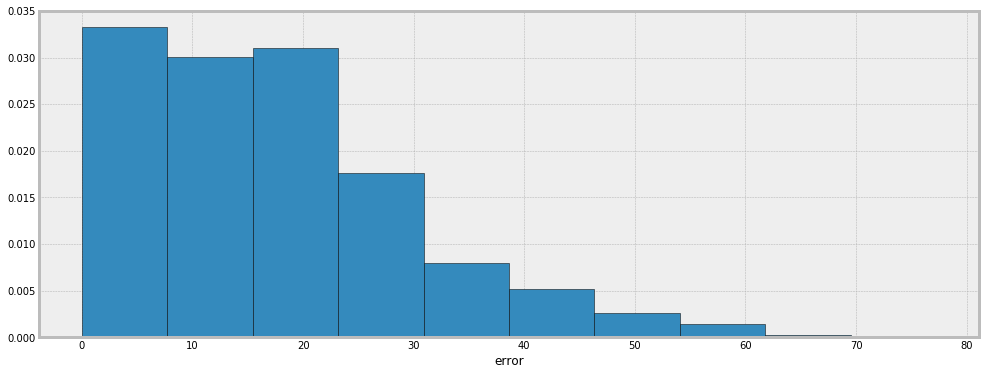

In [16]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
%pylab inline
plt.style.use('bmh')
pylab.rcParams['figure.figsize'] = (15, 6)
plt.hist(error, normed=True,edgecolor='black')
plt.xlabel('error');